#By Rahul Saxena

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import cm
print("Done")

Done


In [2]:
%matplotlib inline

In [3]:
DATA_FILE = '../input/uber-raw-data-aug14.csv'
uber_data = pd.read_csv(DATA_FILE)
uber_data.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


In [4]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829275 entries, 0 to 829274
Data columns (total 4 columns):
Date/Time    829275 non-null object
Lat          829275 non-null float64
Lon          829275 non-null float64
Base         829275 non-null object
dtypes: float64(2), object(2)
memory usage: 25.3+ MB


In [5]:
uber_data['Date/Time'] = pd.to_datetime(uber_data['Date/Time'], format="%m/%d/%Y %H:%M:%S")
uber_data['DayOfWeekNum'] = uber_data['Date/Time'].dt.dayofweek
uber_data['DayOfWeek'] = uber_data['Date/Time'].dt.weekday_name
uber_data['MonthDayNum'] = uber_data['Date/Time'].dt.day
uber_data['HourOfDay'] = uber_data['Date/Time'].dt.hour

In [6]:
uber_data.head()

,Date/Time,Lat,Lon,Base,DayOfWeekNum,DayOfWeek,MonthDayNum,HourOfDay
0,2014-08-01 00:03:00,40.7366,-73.9906,B02512,4,Friday,1,0
1,2014-08-01 00:09:00,40.7260,-73.9918,B02512,4,Friday,1,0
2,2014-08-01 00:12:00,40.7209,-74.0507,B02512,4,Friday,1,0
3,2014-08-01 00:12:00,40.7387,-73.9856,B02512,4,Friday,1,0
4,2014-08-01 00:12:00,40.7323,-74.0077,B02512,4,Friday,1,0


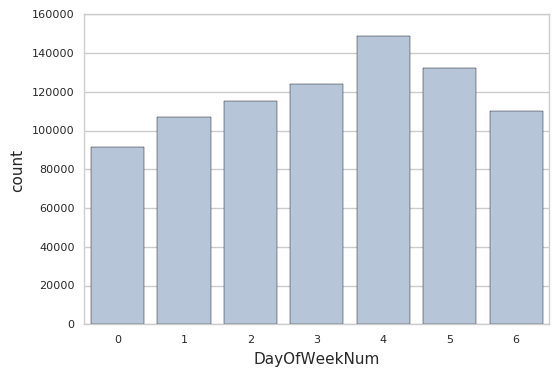

In [7]:
sns.set_style('whitegrid')
ax = sns.countplot(x = 'DayOfWeekNum', data= uber_data, color= "lightsteelblue")
ax.tick_params(labelsize = 8)
plt.show()

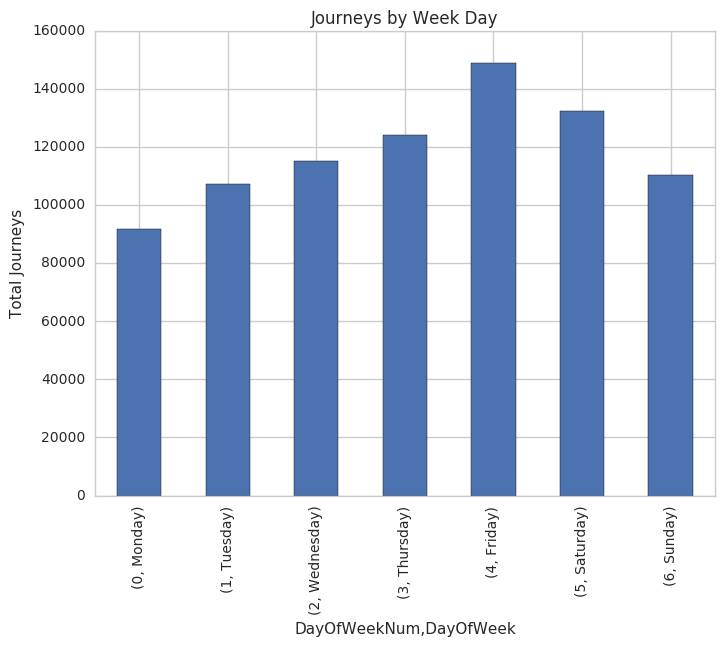

In [8]:
uber_weekdays = uber_data.pivot_table(index=['DayOfWeekNum','DayOfWeek'],
                                  values='Base',
                                  aggfunc='count')
uber_weekdays.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Week Day');

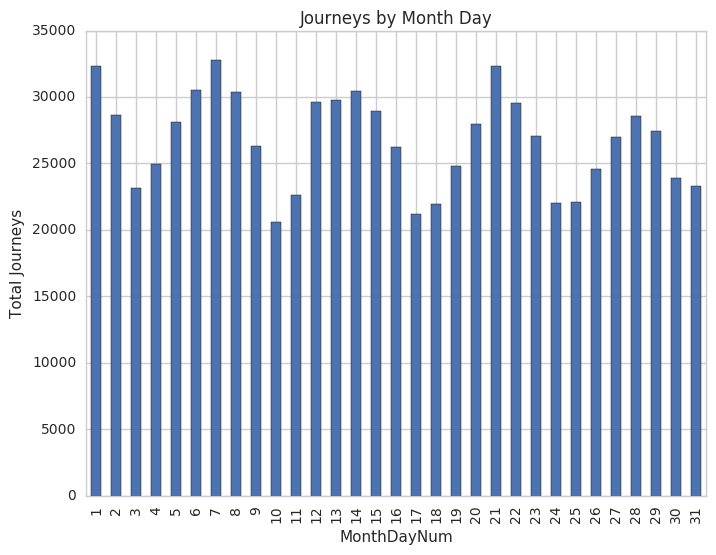

In [9]:
uber_monthdays = uber_data.pivot_table(index=['MonthDayNum'],
                                  values='Base',
                                  aggfunc='count')
uber_monthdays.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Month Day');

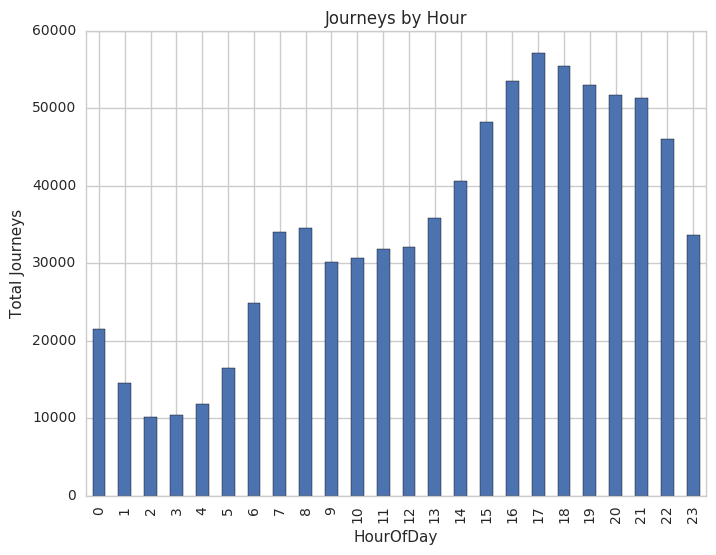

In [10]:
uber_hour = uber_data.pivot_table(index=['HourOfDay'],
                                  values='Base',
                                  aggfunc='count')
uber_hour.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Hour');

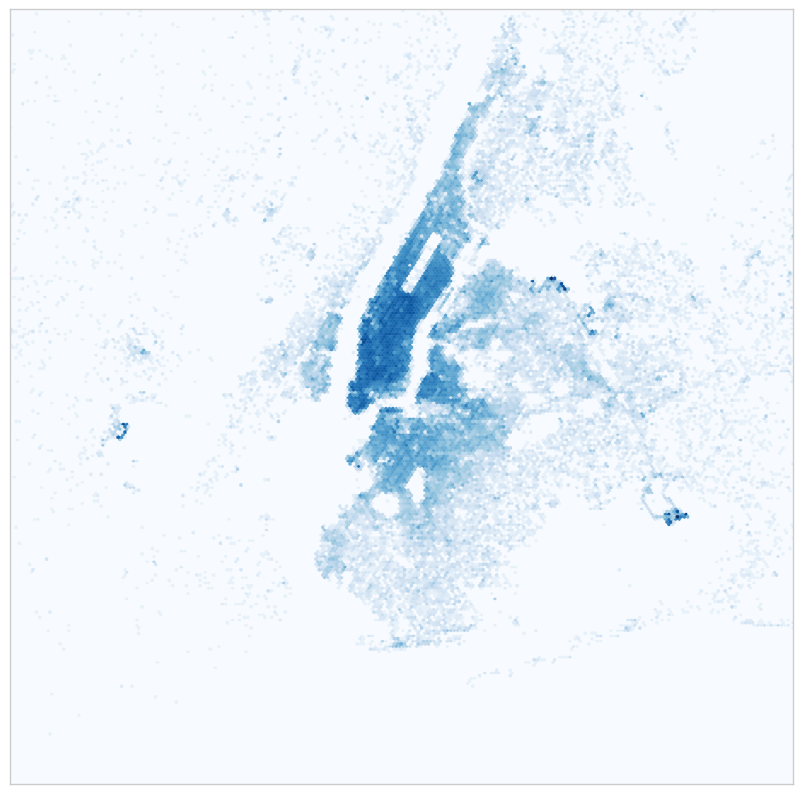

In [11]:
N = 405146
west, south, east, north = -74.26, 40.50, -73.70, 40.92

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)
m = Basemap( projection='merc', llcrnrlat=south, urcrnrlat=north,
            llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='i')
x, y = m(uber_data['Lon'].values, uber_data['Lat'].values)
m.hexbin(x, y, gridsize=1000,
         bins='log', cmap=cm.Blues)